Execution time: 0.138407522157


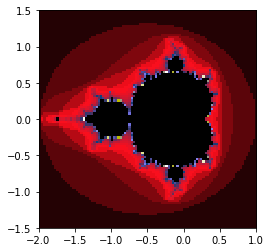

In [41]:
from __future__ import print_function
import numpy as np

def mandelbrot_escape(c, n):
    """ Mandelbrot set escape time algorithm in real and complex components
    """
    z = c
    for i in range(n):
        z = z*z + c
        if abs(z) >= 2.0:
           return i
    return -1

def generate_mandelbrot(xs, ys, n):
    """ Generate a mandelbrot set """
    d = np.empty(shape=(len(ys), len(xs)))
    for j in range(len(ys)):
        for i in range(len(xs)):
            z = xs[i] + ys[j]*1j
            d[j,i] = mandelbrot_escape(z, n)
    return d


if __name__ == '__main__':
    from timeit import default_timer as time
    import matplotlib.pyplot as plt

    x = np.linspace(-2, 1, 100)
    y = np.linspace(-1.5, 1.5, 100)

    t = time()
    d = generate_mandelbrot(x, y, 100)
    print('Execution time:', time() - t)

    plt.imshow(d, extent=[-2,1,-1.5,1.5], cmap=plt.cm.gist_stern)
    plt.show()

In [42]:
#############################################################################
# ex_rect_2.py
#
# 1. Specifying Default values
#############################################################################

# enthought imports
from __future__ import print_function
from traits.api import HasTraits, Float

class Rectangle(HasTraits):
    """ Simple rectangle class with type declarations for two traits.
        Specify default values of 1.0 for the two traits.
    """

    # Width of the rectangle
    width = Float(1.0)

    # Height of the rectangle
    height = Float(2.0)


#############################################################################
# Demo Code
#############################################################################

rect = Rectangle()
print('default rectangle width(1.0):', rect.width)
print('default rectangle height(2.0):', rect.height)

# Using keyword arguments to initialize traits.
rect = Rectangle(width=2.0, height=3.0)
print('keyword intialized rectangle width(2.0):', rect.width)
print('keyword initialized rectangle height(3.0):', rect.height)

default rectangle width(1.0): 1.0
default rectangle height(2.0): 2.0
keyword intialized rectangle width(2.0): 2.0
keyword initialized rectangle height(3.0): 3.0


In [43]:
# enaml is a fork of traits that uses XML-style layout, called atom

In [59]:
from numpy import linspace, sin
from chaco.api import ArrayPlotData, Plot
from enable.component_editor import ComponentEditor
from traits.api import HasTraits, Instance
from traitsui.api import Item, View

class LinePlot(HasTraits):

    plot = Instance(Plot)

    traits_view = View(
            Item('plot', editor=ComponentEditor(),
                 show_label=False),
            width=500, height=500,
            resizable=True,
            title = "Chaco Plot")

    def _plot_default(self):
        # Create the data and the PlotData object
        x = linspace(-14, 14, 100)
        y = sin(x) * x**3
        plotdata = ArrayPlotData(x = x, y = y)
        # Create a Plot and associate it with the PlotData
        plot = Plot(plotdata)
        # Create a line plot in the Plot
        plot.plot(("x", "y"), type="line", color="blue")
        # Set the title
        plot.title = "sin(x) * x^3"
        # Assign it to our self.plot attribute
        return plot

demo = LinePlot()
demo.configure_traits()

True

In [45]:
import numpy as np
y, x = np.meshgrid(np.linspace(-5,5,100), np.linspace(-5,5,100))
r = x**2 + y**2
z = np.sin(r)/r

from mayavi import mlab
mlab.surf(x,y,5*z)

In [60]:
import pickle
pickle.dumps([1,2,3,4]) # provides the unique string representation for the list

'(lp0\nI1\naI2\naI3\naI4\na.'

In [61]:
pickle.loads('(lp0\nI1\naI2\naI3\naI4\na.')

[1, 2, 3, 4]

In [62]:
pickle.dumps(lambda x:x) # doesn't work

"cdill.dill\n_create_function\np0\n(cdill.dill\n_load_type\np1\n(S'CodeType'\np2\ntp3\nRp4\n(I1\nI1\nI1\nI65603\nS'|\\x00\\x00S'\np5\n(Ntp6\n(t(S'x'\np7\ntp8\nS'<ipython-input-62-a603e4bc5d57>'\np9\nS'<lambda>'\np10\nI1\nS''\np11\n(t(ttp12\nRp13\nc__main__\n__dict__\ng10\nNN(dp14\ntp15\nRp16\n."

In [63]:
import dill
dill.dumps(lambda x:x) # this actually lets you dump other things, too!

'\x80\x02cdill.dill\n_create_function\nq\x00(cdill.dill\n_load_type\nq\x01U\x08CodeTypeq\x02\x85q\x03Rq\x04(K\x01K\x01K\x01JC\x00\x01\x00U\x04|\x00\x00Sq\x05N\x85q\x06)U\x01xq\x07\x85q\x08U\x1f<ipython-input-63-e3ad3bac896d>q\tU\x08<lambda>q\nK\x02U\x00q\x0b))tq\x0cRq\rc__builtin__\n__main__\nh\nNN}q\x0etq\x0fRq\x10.'

In [64]:
import multiprocess # not multiprocessing, for the iPython
p = multiprocess.Pool(4)
p.map(lambda x:x*x, range(4)) # the default map is a blocking map

[0, 1, 4, 9]

In [65]:
p.imap_unordered(lambda x:x*x, range(4))
list(_)

[0, 1, 4, 9]

In [66]:
p.apply(lambda x:x*x, (3,))

9

In [67]:
p.close()

In [68]:
p.join()

In [69]:
dill.loads(pickle.dumps('qwfqwrgqehqetn'))

'qwfqwrgqehqetn'

In [70]:
import multiprocess
t = multiprocess.dummy.Pool(10) # thread parallel computing also available!
t.map(lambda x:x*x, range(10))

[0, 1, 4, 9, 16, 25, 36, 49, 64, 81]

In [71]:
t.close() # this prevents the pool from starting new jobs
t.join() # destroys the threads or processes that are active

In [72]:
# t.terminate() is an emergency switch